In [2]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

- 자세한 사항은 다음 프로젝트 홈페이지에서 확인할 수 있다.

- https://github.com/vincentarelbundock/Rdatasets
- 다음은 위 프로젝트에서 제공하는 데이터셋의 목록이다.

- http://vincentarelbundock.github.io/Rdatasets/datasets.html
- 이 목록에 있는 데이터를 가져오려면 우선 "Package"이름과 "Item"을 알아낸 후 다음에 설명하는 get_rdataset 명령을 이용한다.

#### get_rdataset(item, [package="datasets"])
- package: 데이터를 제공하는 R 패키지 이름
- title: 데이터 이름 문자열
- data: 데이터를 담고 있는 데이터프레임
- __doc__: 데이터에 대한 설명 문자열. 이 설명은 R 패키지의 내용을 그대로 가져온 것이므로 예제 코드가 R로 되어 있어 파이썬에서는 사용할 수 없다.

In [3]:
# 예제1
data = sm.datasets.get_rdataset("Titanic", package="datasets")

df = data.data
df.tail()

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [4]:
print(data.__doc__[:1005])

======= ===============
Titanic R Documentation
======= ===============

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

   Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

== ======== ===================
No Name     Levels
1  Class    1st, 2nd, 3rd, Crew
2  Sex      Male, Female
3  Age      Child, Adult
4  Survived No, Yes
== ======== ===================

Details
~~~~~~~

The sinking of the Titanic is a famous event, and new books are still
being published about it. Many well-known facts—from the proportions of
first-class passengers to the ‘women and children first’ policy, and the
fact that that policy was not entire

In [5]:
# 예제2
data = sm.datasets.get_rdataset("deaths", "MASS")

df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [6]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

df["datetime"] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


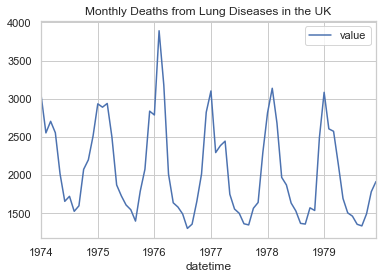

In [7]:
df.plot(x="datetime", y="value")
plt.title(data.title)
plt.show()

- n_samples : 정수 (옵션, 디폴트 100)
    - 표본 데이터의 갯수  N 
- n_features : 정수 (옵션, 디폴트 100)
    - 독립 변수(feature)의 수(차원)  M 
- bias : 실수 (옵션, 디폴트 0.0)
    - y 절편
- noise : 실수 (옵션, 디폴트 0.0)
    - 출력 즉, 종속 변수에 더해지는 잡음  ϵ 의 표준편차
- random_state : 정수 (옵션, 디폴트 None)
    - 난수 발생용 시드값
- coef : 불리언 (옵션, 디폴트 False)
    - True 이면 선형 모형의 계수도 출력

#### 출력은 다음과 같다.

- X : [n_samples, n_features] 형상의 2차원 배열
    - 독립 변수의 표본 데이터 행렬  X 
- y : [n_samples] 형상의 1차원 배열
    - 종속 변수의 표본 데이터 벡터  y 
- coef : [n_features] 형상의 1차원 배열 또는 [n_features, n_targets] 형상의 2차원 배열 (옵션)
    - 선형 모형의 계수 벡터  w , 입력 인수 coef가 True 인 경우에만 출력됨
    
    
#### make_regression() 명령은 내부적으로 다음 과정을 거쳐 가상의 데이터를 만든다.

- 독립변수 데이터 행렬 X를 무작위로 만든다.
- 종속변수와 독립변수를 연결하는 가중치 벡터 w를 무작위로 만든다.
- X와 w를 내적하고 y절편 b 값을 더하여 독립변수와 완전선형인 종속변수 벡터 y_0를 만든다.
- 기댓값이 0이고 표준편차가 noise인 정규분포를 이용하여 잡음 epsilon를 만든다.
- 독립변수와 완전선형인 종속변수 벡터 y_0에 잡음 epsilon을 더해서 종속변수 데이터  y 를 만든다.

w:
 15.896958364551972


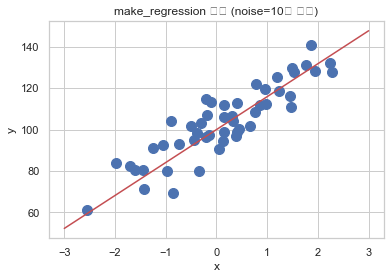

In [9]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

print("w:\n", w)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제 (noise=10인 경우)")
plt.show()

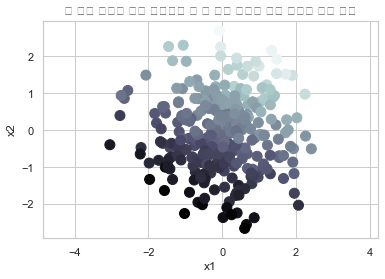

In [10]:
X, y, w = make_regression(
    n_samples=300, n_features=2, noise=10, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립 변수가 서로 독립이고 둘 다 종속 변수와 상관 관계가 있는 경우")
plt.show()

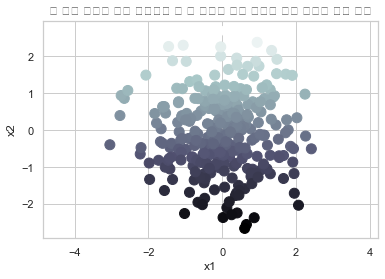

In [11]:
X, y, w = make_regression(
    n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립 변수가 서로 독립이고 둘 중 하나만 종속 변수와 상관 관계가 있는 경우")
plt.show()

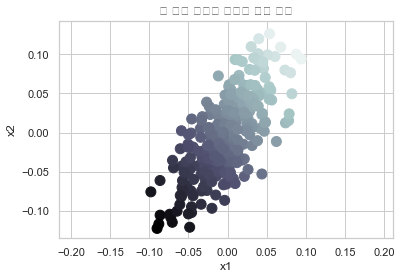

In [12]:
X, y, w = make_regression(
    n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0,
    tail_strength=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립 변수가 독립이 아닌 경우")
plt.show()